IVF CAPSTONE 2: EXPLORATORY DATA ANALYSIS

The aim of this study is to investigate the influence of specific factors on the success rates of in vitro fertilization (IVF) procedures, with a primary focus on embryo age and the ages/age differences of the patient and spouse. We will specifically examine embryos aged 4 or 5 days and analyze how patient age, spouse age, and the age difference between partners correlate with IVF success. Additionally, we will explore the potential impact of sperm quality on IVF outcomes. By delving into these key variables, our objective is to uncover insights into their individual and combined effects on clinical pregnancy rates. Through statistical analysis and predictive modeling, we seek to develop a deeper understanding of the factors driving IVF success and identify potential areas for improvement in fertility treatment protocols.

In [36]:
# Import necessary packages 

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('cleaned_data.csv') 


print(df.head())
print(df.describe())
print(df.dtypes)

# Display unique values for categorical variables
for column in df.select_dtypes(include=['object']):
    print(column)
    print(df[column].unique())

   EMBRYO AGE (DAY)             OPERAMORPHOUS TESEION DAMORPHOUS TESEE  AGE  \
0                 4  Intracytoplasmic Sperm Injection       2019-01-11   44   
1                 4  Intracytoplasmic Sperm Injection       2019-01-11   44   
2                 4                              TESE       2014-06-24   28   
3                 4  Intracytoplasmic Sperm Injection       2014-07-05   30   
4                 4  Intracytoplasmic Sperm Injection       2016-11-15   32   

   SPOUSE AGE   INFERTILITY REASON SPERM EVALUATION  OOCYTE COUNT  M2 OOCYTE  \
0          51                  Age   Amorphous TESE             8          5   
1          51                  Age   Amorphous TESE             8          5   
2          28          Azoospermia   Amorphous TESE            16         13   
3          38  Endometrioma + Male   Amorphous TESE             3          3   
4          31                 Male   Amorphous TESE            23         22   

   2 PN  TR. DAY  TR. ED. EMB.  PREGNANCY  A

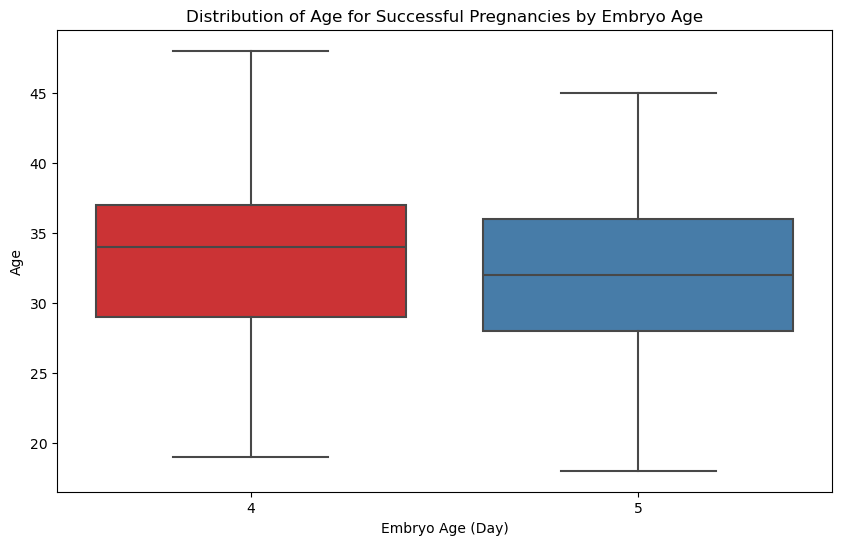

In [37]:
# Filter the data for successful pregnancies and non-blank age values
successful_df = df[(df['PREGNANCY'] == 1) & (df['AGE'].notnull())]

# Check if there are non-null age values
if not successful_df.empty:
    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=successful_df, x='EMBRYO AGE (DAY)', y='AGE', palette='Set1')
    plt.xlabel('Embryo Age (Day)')
    plt.ylabel('Age')
    plt.title('Distribution of Age for Successful Pregnancies by Embryo Age')
    plt.show()
else:
    print("No data available for successful pregnancies with non-null age values.")


The boxplot visualizes the distribution of age for successful pregnancies categorized by embryo age, specifically comparing embryos at day 4 and day 5. It reveals a notable correlation indicating that successful pregnancies are more prevalent in embryos at day 4 compared to day 5. This insight underscores the importance of embryo age in determining pregnancy success rates.

In [12]:
# Conduct statistical tests to infer relationships between variables and IVF success
# Example: T-test for comparing means of two groups (e.g., age for successful vs. unsuccessful IVF)
from scipy.stats import ttest_ind

success_group = df[df['PREGNANCY'] == 1]['AGE']
failure_group = df[df['PREGNANCY'] == 0]['AGE']

t_stat, p_value = ttest_ind(success_group, failure_group, nan_policy='omit')
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -12.574669728130127
P-value: 1.6524245316510774e-35


We use statistical tests such as t-tests, ANOVA, or chi-square tests to infer relationships between variables and IVF success.
Here, we conduct a t-test to compare the means of patient age for successful and unsuccessful IVF outcomes.

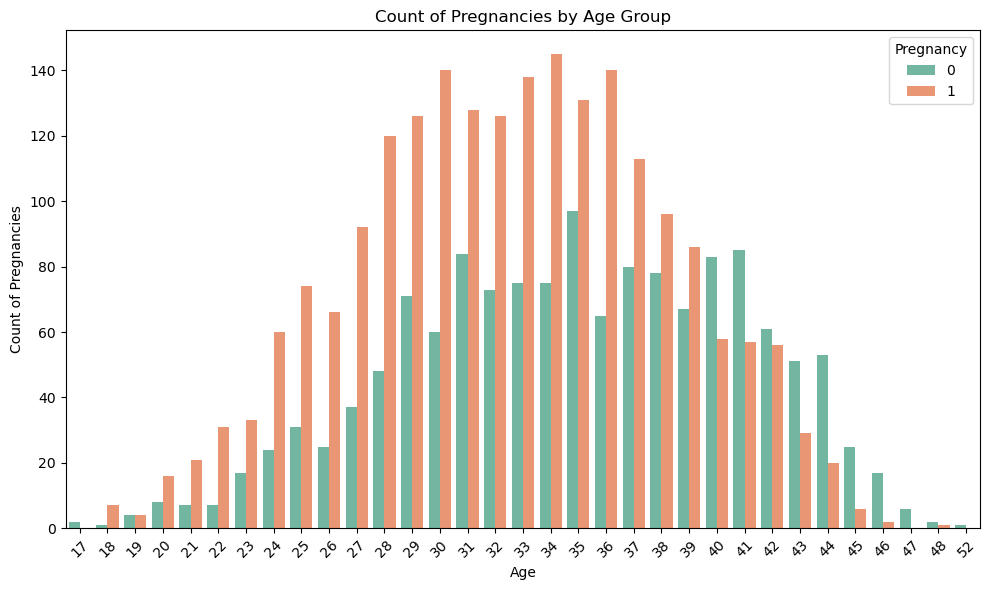

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


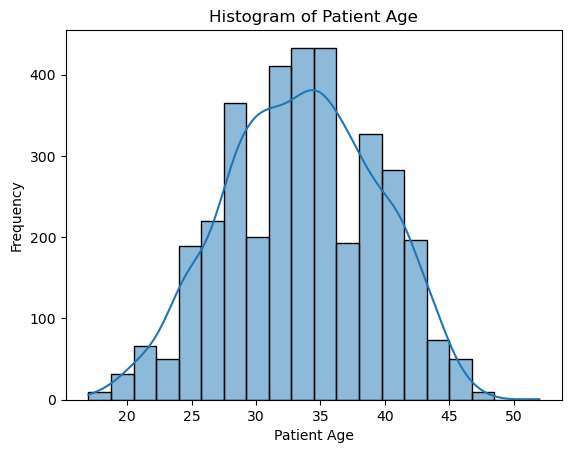

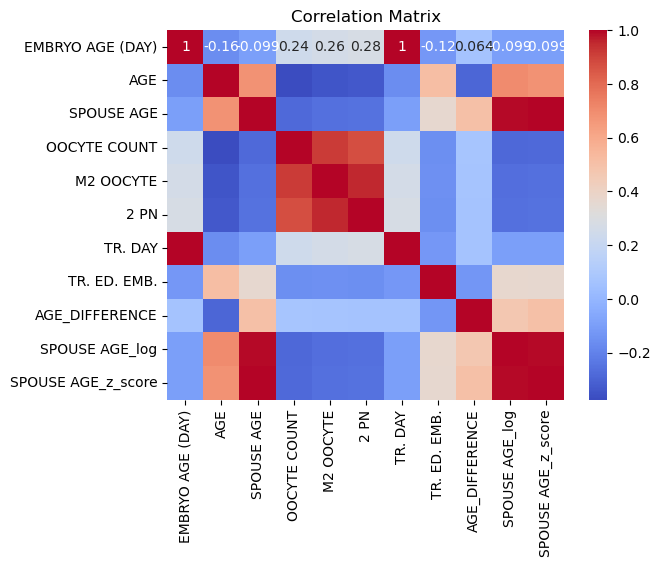

In [13]:
# Convert 'PREGNANCY' column to strings
df['PREGNANCY'] = df['PREGNANCY'].astype(str)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AGE', hue='PREGNANCY', palette='Set2')
plt.xlabel('Age')
plt.ylabel('Count of Pregnancies')
plt.title('Count of Pregnancies by Age Group')
plt.legend(title='Pregnancy', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


# Histogram of patient age
sns.histplot(data=df, x='AGE', bins=20, kde=True)
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Histogram of Patient Age')
plt.show()

# Correlation matrix
# Select numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate correlation matrix for numeric columns
corr_matrix = df[numeric_columns].corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


We use data visualization techniques such as count plots, histograms, and correlation matrices to explore relationships between variables.
Here, we visualize the relationship between patient age and pregnancy success using a count plot, plot the distribution of patient age using a histogram, and visualize the correlation between variables using a correlation matrix.

In [25]:
unique_values = df['SPERM EVALUATION'].unique()
print(unique_values)


['Amorphous TESE' 'Non-obstructive Testicular Sperm Extraction' 'NORMAL'
 'Severe Amorphous TESE' 'TERAmorphous TESEO' 'Virtual' 'ASTENOTERATO'
 'Niemann-Pick' 'OAT' 'Severe OAT' 'Translocation']


In [26]:
# Replace values in "SPERM EVALUATION" column except for "NORMAL"
df.loc[df['SPERM EVALUATION'] != 'NORMAL', 'SPERM EVALUATION'] = 'ABNORMAL'

unique_values = df['SPERM EVALUATION'].unique()
print(unique_values)

['ABNORMAL' 'NORMAL']


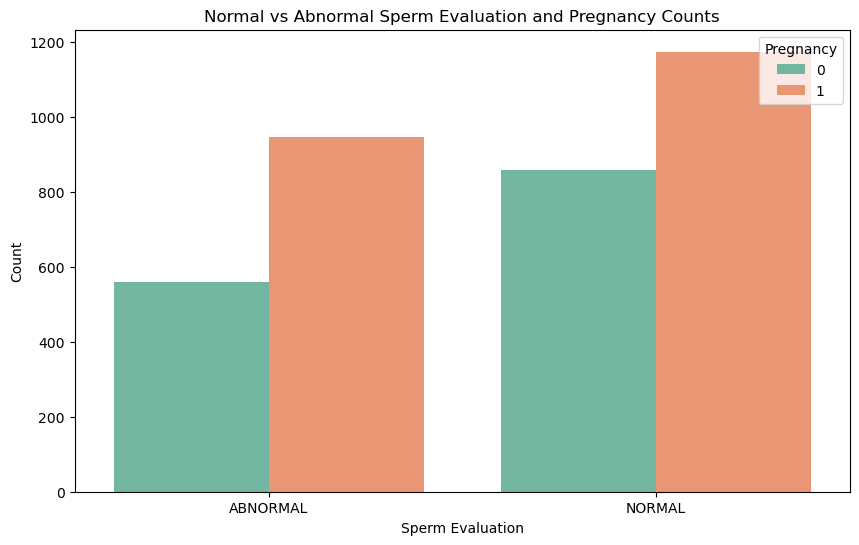

In [29]:
# Convert integer values to strings in the 'PREGNANCY' column
df['PREGNANCY'] = df['PREGNANCY'].astype(str)

# Plot the countplot with the updated dataframe
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SPERM EVALUATION', hue='PREGNANCY', palette='Set2')
plt.xlabel('Sperm Evaluation')
plt.ylabel('Count')
plt.title('Normal vs Abnormal Sperm Evaluation and Pregnancy Counts')
plt.legend(title='Pregnancy', loc='upper right')
plt.show()


This visualization allows for a comparison of pregnancy outcomes between individuals with normal and abnormal sperm evaluations.

Based on our analysis comparing various factors with pregnancy outcomes in in vitro fertilization (IVF) procedures, several key findings have emerged:

Age and Pregnancy: We observed that age does indeed influence pregnancy rates, with younger individuals generally exhibiting higher success rates compared to older individuals. This underscores the importance of considering age as a significant factor in IVF success.

Sperm Evaluation and Pregnancy: Our analysis revealed a notable association between sperm evaluation results and pregnancy outcomes. Specifically, individuals with normal sperm evaluation results tended to have higher pregnancy rates compared to those with abnormal results. This highlights the crucial role of sperm quality in determining IVF success.

Embryo Age (Day 4 vs. Day 5) and Pregnancy: We investigated the impact of embryo age (day 4 vs. day 5) on pregnancy rates and found that day 4 embryos exhibited a higher success rate compared to day 5 embryos. This finding suggests that the timing of embryo transfer during IVF procedures can significantly affect the likelihood of achieving pregnancy.

Overall, our analysis underscores the multifaceted nature of factors influencing IVF success. Age, sperm quality, and embryo age all play pivotal roles in determining pregnancy outcomes. These insights can inform clinical decision-making and improve fertility treatment protocols, ultimately enhancing the effectiveness of IVF procedures and increasing the chances of successful pregnancies for individuals undergoing fertility treatment.